# Synthia's notebook to experiment with the data 

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from helper_code import *

## Load Datasets

In [2]:
NSDUH2021 = readInData("datasets/National Survey on Drug Use and Health 2021/NSDUH_2021_Tab.txt", "txt")
# display(NSDUH2021.head())

/Users/synth/Documents/UNI/418/group-project-gamon/helper_code.py:17: DtypeWarning: Columns (2799) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_table(path)


In [3]:
NSDUH2019 = readInData("datasets/National Survey on Drug Use and Health 2019/NSDUH_2019_Tab.txt", "txt")
# display(NSDUH2019.head())
NSDUH2019.head()

/Users/synth/Documents/UNI/418/group-project-gamon/helper_code.py:17: DtypeWarning: Columns (2575) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_table(path)


,QUESTID2,FILEDATE,CIGEVER,CIGOFRSM,CIGWILYR,CIGTRY,CIGYFU,CIGMFU,CIGREC,CIG30USE,...,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP4,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP
0,43295143,10/09/2020,1,99,99,13,9999,99,4,93,...,3.0,2,2,2,2,2,2,6613.865847,40004,2
1,65095143,10/09/2020,2,99,99,991,9991,91,91,91,...,3.0,2,2,2,2,2,2,6321.580570,40003,1
2,49405143,10/09/2020,1,99,99,22,9999,99,4,93,...,3.0,2,2,2,2,2,2,5045.607492,40008,1
3,51015143,10/09/2020,2,99,99,991,9991,91,91,91,...,1.0,2,2,2,2,2,2,2419.558820,40031,1
4,31825143,10/09/2020,2,99,99,991,9991,91,91,91,...,3.0,2,2,2,2,2,2,575.225454,40010,2


In [4]:
NSDUH2018 = readInData("datasets/National Survey on Drug Use and Health 2018/NSDUH_2018_Tab.tsv", "tsv")
NSDUH2018.head()

/Users/synth/Documents/UNI/418/group-project-gamon/helper_code.py:17: DtypeWarning: Columns (2525) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_table(path)


,QUESTID2,FILEDATE,CIGEVER,CIGOFRSM,CIGWILYR,CIGTRY,CIGYFU,CIGMFU,CIGREC,CIG30USE,...,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP4,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP
0,11015143,10/08/2019,1,99,99,12,9999,99,1,20,...,3.0,2,2,1,1,2,2,20783.261908,40001,1
1,86325143,10/08/2019,2,99,99,991,9991,91,91,91,...,2.0,2,2,3,3,2,2,1095.884074,40004,1
2,35425143,10/08/2019,1,99,99,13,9999,99,4,93,...,3.0,2,2,2,2,2,2,374.445005,40017,2
3,98125143,10/08/2019,2,99,99,991,9991,91,91,91,...,2.0,2,2,2,2,2,2,2421.263435,40038,2
4,15945143,10/08/2019,2,99,99,991,9991,91,91,91,...,2.0,1,2,1,1,2,2,6637.319591,40040,2


In [5]:
CoreTrends2021 = readInData("datasets/Jan-25-Feb-8-2021-Core-Trends-Survey/Jan 25-Feb 8, 2021 - Core Trends Survey - CSV.csv", "csv")
# display(CoreTrends2021.head())

In [6]:
CoreTrends2019 = readInData("datasets/January-8-February-7-2019-Core-Trends-Survey-SPSS/January 8-February 7, 2019 - Core Trends Survey - CSV.csv", "csv")
# display(CoreTrends2019.head())

In [7]:
CoreTrends2018 = readInData("datasets/January 3-10, 2018 - Core Trends Survey/January 3-10, 2018 - Core Trends Survey - CSV.csv", "csv")
display(CoreTrends2018.head())

,respid,sample,comp,int_date,lang,cregion,state,density,usr,qs1,...,inc,party,partyln,hh1,hh3,ql1,ql1a,qc1,weight,cellweight
0,1,1,1,180103,1,1,42,5,U,,...,6,2,,5,4,1,,,1.746359,
1,2,1,1,180103,1,3,45,2,S,,...,4,3,8,2,2,2,2,,1.659764,
2,3,1,1,180103,1,1,34,5,S,,...,4,1,,1,,1,,,0.490804,
3,4,1,1,180103,1,3,24,4,S,,...,2,2,,2,2,1,,,0.947965,
4,5,1,1,180103,1,1,33,2,R,,...,7,1,,3,3,1,,,0.915959,


## Clean up data


###ADMT16 - ADMT21  : How many visits to various types of outpatient facilities for mental health

<br>AGE3: age (intervals of 2, e.g. 1 = age 12 or 13, up to age 65)
<br>IRSEX: gender 1=male, 2=female

<br>ADMT01 : AUINPYR : stayed in hospital for mental health
<br>ADMT25/ADMTREF25 : AURXYR : taken any medication for mental health

<br>YE09 : YEATNDYR : HAs attended some sort of school
<br>YE10 : YESCHFLT : how much they like going to school (1-4, 4=hated it)
<br>YE23b : YEPRBSLV : participated in self-esteem group

<br>NERVE30 : DSTNRV30 : How often felt nervous (1-5, 5=never) in past 30 days
<br>HOPE30 : DSTHOP30 : How often feel hopeless
<br>NOCHR30 : DSTCHR30 : How often felt depressed
<br>DOWN30 : DSTNGD30 : How often feeling down/worthless
<br>WORST30 : DSTWORST : In past year has there been a worse month than current (1-2, 2=No)
<br>DSNERV1 : DSTNRV12 : in WORST30 month, how often felt nervous
<br>DSHOPE : DSTHOP12 : In WORST30 month, how often felt hopeless
<br>DSNOCHR : DSTCHR12 : in WORST30 month, how often felt depressed
<br>DSDOWN : DSTNGD12 : in WORST30 month, how often felt worthless

<br>LICONCEN : IMPCONCN : Difficulty concentrating in their worst month (1-4, 4= severe)
<br>LIGOOUT1 : IMPGOUT : Difficulty leaving house
<br>LISTRAN1 : IMPPEOP : Difficulty dealing with less known people
<br>LISOC1 : IMPSOC : Difficulty participating in social activites
<br>LISOC2 : IMPSOCM : Did mental health problems keep from participating socially

<br>SUI01 : SUICTHNK : Think about suicide in past year
<br>SUI02 : SUIPLANYR :  Plans for suicide

<br>ASC21 : ADDPREV : Long periods of feeling sad


In [8]:
cols = ["AGE3","IRSEX","AUINPYR","AURXYR","YEATNDYR","YESCHFLT","YEPRBSLV","DSTNRV30","DSTHOP30","DSTCHR30","DSTNGD30","DSTWORST","DSTNRV12","DSTHOP12","DSTCHR12","DSTNGD12","IMPCONCN","IMPGOUT","IMPPEOP","IMPSOC","IMPSOCM","SUICTHNK","SUIPLANYR","ADDPREV"]

NSDUH2021_wantedCols = getWantedColumns(NSDUH2021, cols)

In [9]:
#Removed "SUIPLANYR" because its not present
cols = ["AGE2", "IRSEX", "AUINPYR","AURXYR","YEATNDYR","YESCHFLT","YEPRBSLV","DSTNRV30","DSTHOP30","DSTCHR30","DSTNGD30","DSTWORST","DSTNRV12","DSTHOP12","DSTCHR12","DSTNGD12","IMPCONCN","IMPGOUT","IMPPEOP","IMPSOC","IMPSOCM","SUICTHNK","ADDPREV"]

NSDUH2019_wantedCols = getWantedColumns(NSDUH2019, cols)
NSDUH2019_wantedCols.columns

Index(['AGE2', 'IRSEX', 'AUINPYR', 'AURXYR', 'YEATNDYR', 'YESCHFLT',
       'YEPRBSLV', 'DSTNRV30', 'DSTHOP30', 'DSTCHR30', 'DSTNGD30', 'DSTWORST',
       'DSTNRV12', 'DSTHOP12', 'DSTCHR12', 'DSTNGD12', 'IMPCONCN', 'IMPGOUT',
       'IMPPEOP', 'IMPSOC', 'IMPSOCM', 'SUICTHNK', 'ADDPREV'],
      dtype='object')

In [10]:
NSDUH2018_wantedCols = getWantedColumns(NSDUH2018, cols)


Core trends variables:

web1a    -	Twitter
web1b    -	Instagram
web1c    -	Facebook 
web1d    -	Snapchat
web1e    -	YouTube

How often use social media, 1-5, 5=less often

sns2a    -	Twitter
sns2b    -	Instagram
sns2c    -	Facebook 
sns2d    -	Snapchat
sns2e    -	YouTube

gender  - gender
age     - age



In [11]:
CoreTrends2021Cols = ["web1a", "web1b", "web1c", "web1d", "web1e","sns2a", "sns2b", "sns2c", "sns2d", "sns2e","gender", "age"]

CoreTrends2021_wantedCols = getWantedColumns(CoreTrends2021, CoreTrends2021Cols)

In [12]:
CoreTrends2019Cols = ["web1a", "web1b", "web1c", "web1d", "web1e","sns2a", "sns2b", "sns2c", "sns2d", "sns2e","sex", "age"]

CoreTrends2019_wantedCols = getWantedColumns(CoreTrends2019, CoreTrends2019Cols)

In [13]:
# CoreTrends2018Cols = ["respid", "web1a", "web1b", "web1c", "web1d", "web1e","sns2a", "sns2b", "sns2c", "sns2d", "sns2e","sex", "age"]

CoreTrends2018Cols = ["web1a", "web1b", "web1c", "web1d", "web1e","sns2a", "sns2b", "sns2c", "sns2d", "sns2e","sex", "age"]

CoreTrends2018_wantedCols = getWantedColumns(CoreTrends2018, CoreTrends2018Cols)

In [14]:
CoreTrends2018_wantedCols.head()

,web1a,web1b,web1c,web1d,web1e,sns2a,sns2b,sns2c,sns2d,sns2e,sex,age
0,2,1,1,1,1,,1,1,3,3,2,33
1,2,2,2,2,2,,,,,,2,76
2,2,2,2,2,2,,,,,,2,99
3,2,2,1,2,2,,,3,,,2,60
4,2,2,1,2,1,,,3,,2,1,55


In [15]:
NSDUH2018_wantedCols.columns

Index(['AGE2', 'IRSEX', 'AUINPYR', 'AURXYR', 'YEATNDYR', 'YESCHFLT',
       'YEPRBSLV', 'DSTNRV30', 'DSTHOP30', 'DSTCHR30', 'DSTNGD30', 'DSTWORST',
       'DSTNRV12', 'DSTHOP12', 'DSTCHR12', 'DSTNGD12', 'IMPCONCN', 'IMPGOUT',
       'IMPPEOP', 'IMPSOC', 'IMPSOCM', 'SUICTHNK', 'ADDPREV'],
      dtype='object')

In [16]:
id=['AGE2']
values=['DSTHOP30']

NSDUH2018_long = cleanUpNSDUH(NSDUH2018_wantedCols, id, values)
NSDUH2019_long = cleanUpNSDUH(NSDUH2019_wantedCols, id, values)
NSDUH2021_long = cleanUpNSDUH(NSDUH2021_wantedCols, ['AGE3'], values)

In [17]:
print(NSDUH2021_long)

       AGE3  variable  value
0         8  DSTHOP30    3.0
1        11  DSTHOP30    5.0
2         6  DSTHOP30    5.0
3         9  DSTHOP30    3.0
4         6  DSTHOP30    5.0
...     ...       ...    ...
58029     9  DSTHOP30    5.0
58030     8  DSTHOP30    4.0
58031     5  DSTHOP30    5.0
58032     9  DSTHOP30    5.0
58033     5  DSTHOP30    5.0

[45745 rows x 3 columns]


In [18]:
CoreTrends2021_wantedCols.columns

Index(['web1a', 'web1b', 'web1c', 'web1d', 'web1e', 'sns2a', 'sns2b', 'sns2c',
       'sns2d', 'sns2e', 'gender', 'age'],
      dtype='object')

In [19]:
# CoreTrends2018_long = cleanUpCoreTrends(CoreTrends2018_wantedCols)
# CoreTrends2018_wantedCols = CoreTrends2018_wantedCols.drop(columns=['sns2a'])
id = ['age']
values = ["sns2b", "sns2c", "sns2d", "sns2e"]
CoreTrends2018_long = cleanUpCoreTrends(CoreTrends2018_wantedCols, id, values, 2018)
CoreTrends2019_long = cleanUpCoreTrends(CoreTrends2019_wantedCols, id, values, 2019)
CoreTrends2021_long = cleanUpCoreTrends(CoreTrends2021_wantedCols, id, values, 2021)

In [20]:
print(CoreTrends2018_long['age'].min())
print(NSDUH2018_long)

18-25
       AGE2  variable  value
0        16  DSTHOP30    5.0
1        12  DSTHOP30    5.0
2         8  DSTHOP30    3.0
3        15  DSTHOP30    5.0
4        15  DSTHOP30    5.0
...     ...       ...    ...
56306    14  DSTHOP30    5.0
56307    14  DSTHOP30    5.0
56310     8  DSTHOP30    5.0
56311    13  DSTHOP30    3.0
56312    10  DSTHOP30    1.0

[42687 rows x 3 columns]


In [21]:
SMUse_sum_CoreTrends2018 = CoreTrends2018_long.groupby(['age']).agg(count=('value', 'count'))
SMUse_sum_CoreTrends2019 = CoreTrends2019_long.groupby(['age']).agg(count=('value', 'count'))
SMUse_sum_CoreTrends2021 = CoreTrends2021_long.groupby(['age']).agg(count=('value', 'count'))


In [22]:
SMUse_sum_CoreTrends2018 = SMUse_sum_CoreTrends2018.reset_index()
SMUse_sum_CoreTrends2019 = SMUse_sum_CoreTrends2019.reset_index()
SMUse_sum_CoreTrends2021 = SMUse_sum_CoreTrends2021.reset_index()

SMUse_sum_CoreTrends2018['dataset'] = '2018'
SMUse_sum_CoreTrends2019['dataset'] = '2019'
SMUse_sum_CoreTrends2021['dataset'] = '2021'

CoreTrends_SMUseSum_concat = pd.concat([SMUse_sum_CoreTrends2018,SMUse_sum_CoreTrends2019, SMUse_sum_CoreTrends2021])

<Axes: xlabel='age', ylabel='count'>

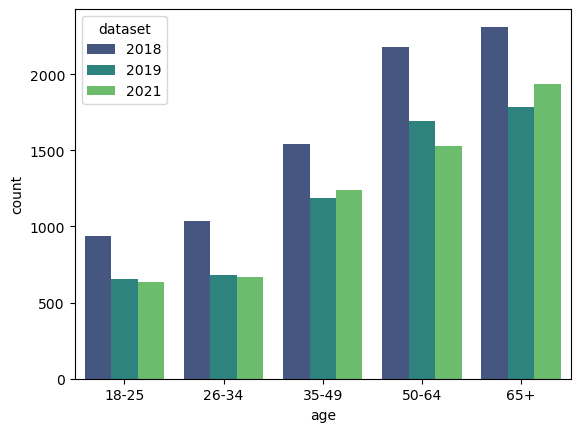

In [23]:
sns.barplot(data=CoreTrends_SMUseSum_concat, x='age', y='count', hue='dataset' ,palette='viridis')


In [49]:
id=['AGE2']
id2=['AGE3']
# values = ['IRSEX', 'AUINPYR', 'AURXYR', 'YEATNDYR', 'YESCHFLT',
#             'YEPRBSLV', 'DSTNRV30', 'DSTHOP30', 'DSTCHR30', 'DSTNGD30', 'DSTWORST',
#             'DSTNRV12', 'DSTHOP12', 'DSTCHR12', 'DSTNGD12', 'IMPCONCN', 'IMPGOUT',
#             'IMPPEOP', 'IMPSOC', 'IMPSOCM', 'SUICTHNK', 'ADDPREV']
values = ['DSTCHR30']

NSDUH2018_long = cleanUpNSDUH(NSDUH2018_wantedCols,id,values)
NSDUH2019_long = cleanUpNSDUH(NSDUH2019_wantedCols,id,values)
NSDUH2021_long = cleanUpNSDUH(NSDUH2021_wantedCols,id2,values)


In [50]:
NSDUH2018_long

,AGE2,variable,value
0,16,DSTCHR30,5.0
1,12,DSTCHR30,5.0
2,8,DSTCHR30,3.0
3,15,DSTCHR30,5.0
4,15,DSTCHR30,5.0
...,...,...,...
56306,14,DSTCHR30,5.0
56307,14,DSTCHR30,5.0
56310,8,DSTCHR30,4.0
56311,13,DSTCHR30,3.0


In [54]:
SMUse_sum_NSDUH2018 = NSDUH2018_long.groupby(['AGE2']).agg(count=('value', 'count'))
SMUse_sum_NSDUH2019 = NSDUH2019_long.groupby(['AGE2']).agg(count=('value', 'count'))
SMUse_sum_NSDUH2021 = NSDUH2021_long.groupby(['AGE2']).agg(count=('value', 'count'))

In [58]:
SMUse_sum_NSDUH2021=SMUse_sum_NSDUH2021.rename(columns={'AGE3': 'AGE2'})


In [59]:
SMUse_sum_NSDUH2021

,count
AGE3,
4,4765
5,5182
6,3563
7,3926
8,5304
9,12152
10,5539
11,5312


In [46]:
SMUse_sum_NSDUH2018 = SMUse_sum_NSDUH2018.reset_index()
SMUse_sum_NSDUH2019 = SMUse_sum_NSDUH2019.reset_index()
SMUse_sum_NSDUH2021 = SMUse_sum_NSDUH2021.reset_index()

SMUse_sum_NSDUH2018['dataset'] = '2018'
SMUse_sum_NSDUH2019['dataset'] = '2019'
SMUse_sum_NSDUH2021['dataset'] = '2021'

NSDUH_concat = pd.concat([SMUse_sum_NSDUH2018,SMUse_sum_NSDUH2019,SMUse_sum_NSDUH2021])
NSDUH_concat = NSDUH_concat.rename(columns={'AGE2': 'age'})

In [47]:
NSDUH_concat

,level_0,index,age,count,dataset
0,0,0,1,5760,2018
1,1,1,2,6498,2018
2,2,2,3,6489,2018
3,3,3,4,6475,2018
4,4,4,5,6808,2018
5,5,5,6,6530,2018
6,6,6,7,25953,2018
7,7,7,8,23128,2018
8,8,8,9,22648,2018
9,9,9,10,23268,2018


<Axes: xlabel='age', ylabel='count'>

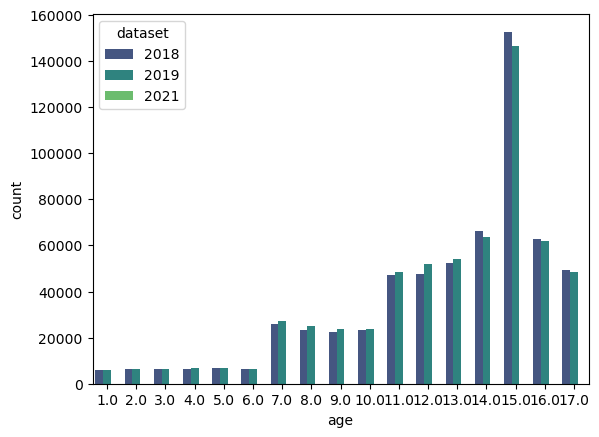

In [33]:
sns.barplot(data=NSDUH_concat, x='age', y='count',hue='dataset', palette='viridis')


In [34]:
print(NSDUH_concat)
print(CoreTrends_SMUseSum_concat)

     age   count dataset  AGE3
0    1.0    5760    2018   NaN
1    2.0    6498    2018   NaN
2    3.0    6489    2018   NaN
3    4.0    6475    2018   NaN
4    5.0    6808    2018   NaN
5    6.0    6530    2018   NaN
6    7.0   25953    2018   NaN
7    8.0   23128    2018   NaN
8    9.0   22648    2018   NaN
9   10.0   23268    2018   NaN
10  11.0   47385    2018   NaN
11  12.0   47497    2018   NaN
12  13.0   52524    2018   NaN
13  14.0   66245    2018   NaN
14  15.0  152736    2018   NaN
15  16.0   62724    2018   NaN
16  17.0   49263    2018   NaN
0    1.0    5914    2019   NaN
1    2.0    6463    2019   NaN
2    3.0    6455    2019   NaN
3    4.0    6792    2019   NaN
4    5.0    6722    2019   NaN
5    6.0    6536    2019   NaN
6    7.0   27078    2019   NaN
7    8.0   24957    2019   NaN
8    9.0   23899    2019   NaN
9   10.0   23552    2019   NaN
10  11.0   48408    2019   NaN
11  12.0   52010    2019   NaN
12  13.0   53959    2019   NaN
13  14.0   63519    2019   NaN
14  15.0

In [35]:
NSDUH_concat = NSDUH_concat.rename(columns={'count': 'DSTHOP30'})
CoreTrends_SMUseSum_concat = CoreTrends_SMUseSum_concat.rename(columns={'count': 'sum_SMUse'})
print(NSDUH_concat)
print(CoreTrends_SMUseSum_concat)

     age  DSTHOP30 dataset  AGE3
0    1.0      5760    2018   NaN
1    2.0      6498    2018   NaN
2    3.0      6489    2018   NaN
3    4.0      6475    2018   NaN
4    5.0      6808    2018   NaN
5    6.0      6530    2018   NaN
6    7.0     25953    2018   NaN
7    8.0     23128    2018   NaN
8    9.0     22648    2018   NaN
9   10.0     23268    2018   NaN
10  11.0     47385    2018   NaN
11  12.0     47497    2018   NaN
12  13.0     52524    2018   NaN
13  14.0     66245    2018   NaN
14  15.0    152736    2018   NaN
15  16.0     62724    2018   NaN
16  17.0     49263    2018   NaN
0    1.0      5914    2019   NaN
1    2.0      6463    2019   NaN
2    3.0      6455    2019   NaN
3    4.0      6792    2019   NaN
4    5.0      6722    2019   NaN
5    6.0      6536    2019   NaN
6    7.0     27078    2019   NaN
7    8.0     24957    2019   NaN
8    9.0     23899    2019   NaN
9   10.0     23552    2019   NaN
10  11.0     48408    2019   NaN
11  12.0     52010    2019   NaN
12  13.0  

In [36]:
print(CoreTrends_SMUseSum_concat.shape)
print(NSDUH_concat.shape)

(15, 3)
(45, 4)


In [37]:
NSDUH_concat

,age,DSTHOP30,dataset,AGE3
0,1.0,5760,2018,NaN
1,2.0,6498,2018,NaN
2,3.0,6489,2018,NaN
3,4.0,6475,2018,NaN
4,5.0,6808,2018,NaN
5,6.0,6530,2018,NaN
6,7.0,25953,2018,NaN
7,8.0,23128,2018,NaN
8,9.0,22648,2018,NaN
9,10.0,23268,2018,NaN


In [38]:
CoreTrends_NSDUH_merge= pd.concat([NSDUH_concat, CoreTrends_SMUseSum_concat])

In [39]:
CoreTrends_NSDUH_merge_test = pd.merge(NSDUH_concat, CoreTrends_SMUseSum_concat, on=['age','dataset'], how='left')

In [40]:
CoreTrends_NSDUH_merge_test.reset_index()
CoreTrends_NSDUH_merge_test

,age,DSTHOP30,dataset,AGE3,sum_SMUse
0,1.0,5760,2018,NaN,NaN
1,2.0,6498,2018,NaN,NaN
2,3.0,6489,2018,NaN,NaN
3,4.0,6475,2018,NaN,NaN
4,5.0,6808,2018,NaN,NaN
5,6.0,6530,2018,NaN,NaN
6,7.0,25953,2018,NaN,NaN
7,8.0,23128,2018,NaN,NaN
8,9.0,22648,2018,NaN,NaN
9,10.0,23268,2018,NaN,NaN


KeyError: 'y'

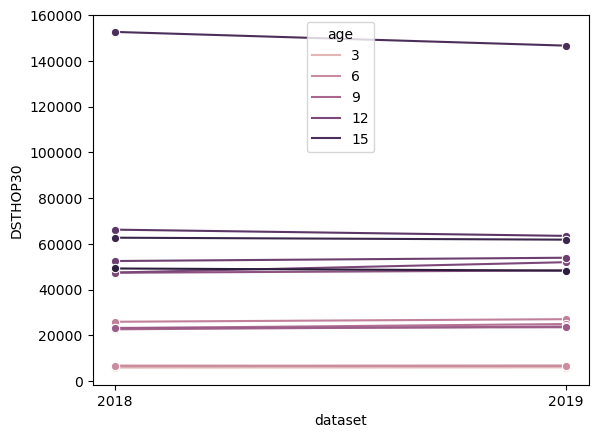

In [41]:
# sns.lineplot(data=CoreTrends_SMUseSum_concat, x='dataset', y='count', hue='age', marker='o')
# sns.lineplot(data=NSDUH_concat, x='dataset', y='count', hue='age', marker='o')
# plt.show()

sns.lineplot(data=CoreTrends_NSDUH_merge_test, x='dataset', y='DSTHOP30', hue='age', marker='o')
sns.lineplot(data=CoreTrends_NSDUH_merge_test, x='dataset', y='sum_SMUse', hue='age', marker='o')


## Older code under here

In [ ]:
print(NSDUH2018_wantedCols.columns)
print(CoreTrends2018_wantedCols.columns)
CoreTrends2018_wantedCols.shape

Index(['AGE2', 'IRSEX', 'AUINPYR', 'AURXYR', 'YEATNDYR', 'YESCHFLT',
       'YEPRBSLV', 'DSTNRV30', 'DSTHOP30', 'DSTCHR30', 'DSTNGD30', 'DSTWORST',
       'DSTNRV12', 'DSTHOP12', 'DSTCHR12', 'DSTNGD12', 'IMPCONCN', 'IMPGOUT',
       'IMPPEOP', 'IMPSOC', 'IMPSOCM', 'SUICTHNK', 'ADDPREV'],
      dtype='object')
Index(['web1a', 'web1b', 'web1c', 'web1d', 'web1e', 'sns2a', 'sns2b', 'sns2c',
       'sns2d', 'sns2e', 'sex', 'age'],
      dtype='object')


(2002, 12)

Map the ages from CoreTrends to match the age ranges in NSDUH for simplicity

In [ ]:
age_mapping_CoreToNSDUH2018 = { 12: 1, 13: 2, 14: 3, 15: 4, 16: 5, 17: 6, 18: 7, 19: 8, 20: 9, 21: 10, 22: 11, 23: 11, 24: 12, 25: 12, 
                                   **{age: 13 for age in range(26, 30)}, **{age: 14 for age in range(30, 35)}, **{age: 15 for age in range(35, 50)}, **{age: 16 for age in range(50, 65)}, **{age: 17 for age in range(65, 100)}}
CoreTrends2018_wantedCols['age'] = CoreTrends2018_wantedCols['age'].map(age_mapping_CoreToNSDUH2018)
CoreTrends2018_wantedCols['age']  = CoreTrends2018_wantedCols['age'].astype('Int64')

In [ ]:
NSDUH2018_wantedCols['AGE2']  = NSDUH2018_wantedCols['AGE2'].astype('Int64')

In [ ]:
CoreTrends2018_wantedCols.shape

(2002, 12)

In [ ]:
merged_2018 = convertAndMergeCoreTrendstoNSDUH(CoreTrends2018_wantedCols, NSDUH2018_wantedCols, 2018)

In [ ]:
merged_2018.shape

(4104429, 35)

In [ ]:
merged_2019 = convertAndMergeCoreTrendstoNSDUH(CoreTrends2019_wantedCols, NSDUH2019_wantedCols, 2019)

In [ ]:
merged_2021 = convertAndMergeCoreTrendstoNSDUH(CoreTrends2021_wantedCols, NSDUH2021_wantedCols, 2021)

In [ ]:
merged_2018.head()
merged_2018.shape

(4104429, 35)

In [ ]:
merged_2018['average_SM_use'] = merged_2018[['sns2a', 'sns2b', 'sns2c','sns2d']].sum(axis=1, skipna=True)
merged_2019['average_SM_use'] = merged_2019[['sns2a', 'sns2b', 'sns2c','sns2d']].sum(axis=1, skipna=True)
merged_2021['average_SM_use'] = merged_2021[['sns2a', 'sns2b', 'sns2c','sns2d']].sum(axis=1, skipna=True)


In [ ]:
merged_2018 = merged_2018.dropna(subset=['average_SM_use', 'AGE2'])
merged_2019 = merged_2019.dropna(subset=['average_SM_use', 'AGE2'])
merged_2021 = merged_2021.dropna(subset=['average_SM_use', 'AGE3'])

In [ ]:
merged_2018_SMUseAge = merged_2018[['age', 'average_SM_use']]
merged_2019_SMUseAge = merged_2019[['age', 'average_SM_use']]
merged_2021_SMUseAge = merged_2021[['age', 'average_SM_use']]

In [ ]:
merged_2018_SMUseAge = merged_2018_SMUseAge.dropna()
merged_2019_SMUseAge = merged_2019_SMUseAge.dropna()
merged_2021_SMUseAge = merged_2021_SMUseAge.dropna()

In [ ]:
average_use_by_age2018 = merged_2018_SMUseAge.groupby('age')['average_SM_use'].mean()
average_use_by_age2019 = merged_2019_SMUseAge.groupby('age')['average_SM_use'].mean()
average_use_by_age2021 = merged_2021_SMUseAge.groupby('age')['average_SM_use'].mean()

TypeError: Could not convert                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2  213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 2135 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 235 23 21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21 4113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113411341134113                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5 3113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113311331133113   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   35555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 323 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221 221433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433 433   55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  5512111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112113 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2 3 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 34 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 1113251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251325132513251  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3 4311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311431143114311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231123112311231151125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251122121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121212121222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 222 3332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332333233323332 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1  112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 2141211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211121112111211 22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  3211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211321132113211 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3 21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115  5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3  2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2 51125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251125112511251122 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 5515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515551555155515 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 231 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 to numeric

In [ ]:
# merged_20182019 = pd.merge(merged_2018_SMUseAge, merged_2019_SMUseAge, left_on='age', right_on='age', how='left')
# merged_allYears = pd.merge(merged_20182019, merged_2021_SMUseAge, left_on='age', right_on='age', how='left')


In [ ]:
# plt.plot(merged_2018_SMUseAge['age'], merged_2018_SMUseAge['average_SM_use'], label="2018")
# plt.plot(merged_2019_SMUseAge['age'], merged_2019_SMUseAge['average_SM_use'], label="2019")
# plt.plot(merged_2021_SMUseAge['age'], merged_2021_SMUseAge['average_SM_use'], label="2021")

average_use_by_age2018_df = average_use_by_age2018.reset_index()
average_use_by_age2019_df = average_use_by_age2019.reset_index()
average_use_by_age2021_df = average_use_by_age2021.reset_index()

average_use_by_age2018_df['dataset'] = '2018'
average_use_by_age2019_df['dataset'] = '2019'
average_use_by_age2021_df['dataset'] = '2021'

combined_df = pd.concat([average_use_by_age2018_df, average_use_by_age2019_df, average_use_by_age2021_df])

print(combined_df)


In [ ]:
sns.barplot(data=combined_df, x='age', y='average_SM_use', hue='dataset' ,palette='viridis')


In [ ]:
sns.barplot(data=merged_2018, x='AGE2', y='average_SM_use',palette='viridis')
plt.xlabel("Age group")
plt.ylabel("Social media usage")
plt.title("Snapchat and TikTok users perceive poorer economic conditions than users on other platforms.")
plt.xticks(rotation=45)